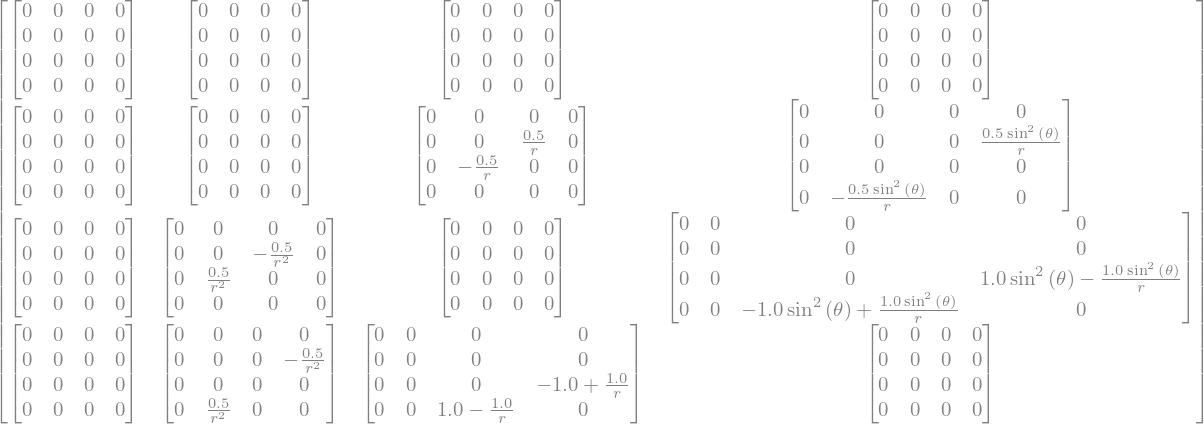

In [4]:
from sympy import *
from einsteinpy.symbolic import MetricTensor
from numpy import zeros

init_printing() 

#defining the symbols 
syms = symbols("t r theta phi")

# defining the metric
metric = [[0 for i in range(4)] for j in range(4)]
metric[0][0] = -1
metric[1][1] = syms[1]
metric[2][2] = syms[1]**2
metric[3][3] = (syms[1]**2)*(sin(syms[2])**2)

# creating metric object
metric_obj = MetricTensor(metric, syms)

def derivative_of_metric(xmetric, i, j, k):
    """
    Taking the derivative of a given metric; \partial_i (g_jk)
    Where g_jk is the metric and the \partial_i is the partial derivative with respect to i 

    Input: xmetric : given metric
           i,j,k - Indices that runs from 0-4
    
    Output: the partial derivative of a given metric's [j][k] component with respect to the i'th  component
    """
    expr = xmetric[j][k]
    return diff(expr, syms[i])

def derivative_of_chris(xchris, i, j, k, l):
    """
    Taking the derivative of a given christoffel symbol; \partial_i (\Eta_jkl)
    Where \Eta_jkl is the christoffel symbol and the \partial_i is the partial derivative with respect to i 

    Input: xchris : given christoffel symbol
           i,j,k,l - Indices that runs from 0-4
    
    Output: the partial derivative of a given Chris Smybols's [j][k][l] component with respect to the i'th  component
    """
    expr = xchris[j, k, l]
    return diff(expr, syms[i])


def christoffel_sym_calctr(xmetric):
    """
    Input: the metric tensor
    Output: Christoffel symbol for the given metric
    """
    #creating an empty tensor to fill
    Chris_sym = MutableSparseNDimArray(zeros((4,)*3)) 
    inverse_metric = xmetric.inv() 
    for gamma in range(0, 4):
        for beta in range(0, 4):
            for nu in range(0, 4):
                einstein_sum = 0
                for alpha in range (0, 4):
                    I1 = derivative_of_metric(xmetric, nu, alpha, beta)
                    I2 = derivative_of_metric(xmetric, beta, alpha, nu)
                    I3 = derivative_of_metric(xmetric, alpha, beta, nu)
                    S = I1 + I2 - I3
                    einstein_sum += 1/2 * inverse_metric[alpha, gamma] * S     
                Chris_sym[gamma, beta, nu] = einstein_sum
    return Chris_sym

#the Christofeel symbol for the given metric
chris_symbol = christoffel_sym_calctr(metric_obj) 


def riemann_tensor_calctr(xchris_symbol):
    """
    Input: the christofeel symbol
    Output: the riemann curvature tensor
    """
    riemann_curv_tensor = MutableSparseNDimArray(zeros((4,)*4))
    for i in range(0, 4):
        for a in range(0, 4):
            for b in range(0, 4):
                for c in range(0, 4):
                    einstein_sum = 0
                    Q1 = derivative_of_chris(xchris_symbol, b, i, c, a)
                    Q2 = derivative_of_chris(xchris_symbol, c, i, b, a)
                    for m in range(0, 4):
                        I1 = xchris_symbol[i, b, m] * xchris_symbol[m, c, a]
                        I2 = xchris_symbol[i, c, m] * xchris_symbol[m, b, a]
                        einstein_sum += I1 - I2
                    riemann_curv_tensor[i, a, b, c] = Q1 - Q2 + einstein_sum
    return riemann_curv_tensor

R = riemann_tensor_calctr(chris_symbol)
R.tolist()
R

In [ ]:
chris_symbol.tolist()
chris_symbol